## Getting Started

#### Instructions to start:

All scripts / notebook files (files ending with .ipynb) need to be in a local directory (i.e. on the data analysis computer or laptop). You can't access scripts on the server, but you can store all your csv and output files there and I recommend backing up your scripts on the server as well. I like to put them in a folder on the desktop that's easy to navigate to.

To access a notebook, type "jupyter" in the windows start bar and open "Jupyter Notebook"
A web browser will open and you can go to the directory where you have stored the script. 
Click on the text to open it in a new tab. On the original directory tab it will now show as green because it is running.

#### Running the notebook

Click on each gray cell block to be able to modify it. To "Run" the entire cell block, press CTRL+Enter. When a cell block is running, there will be an * next to it, and when it is finished there will be a number next to it. The number shows you the order the cells were run in. You first need to run the "load packages" cell.

#### load packages (check version on maven_explorer and note)

In [1]:
import maven_explorer as mv ## version 20190320
import pandas as pd
import numpy as np
from pyteomics import mgf, mzxml, mass
import os
import matplotlib.pyplot as plt


#### Set variables

This is the cell block you need to change. Change the variables "date_name", "col_name", "charge_name" and "phase_name" to end up with the "base_name" that will be added to your result files. In this case the base_name is "20171222_PERK_E4_pos_PC" but it can be anything you want. If you need to change something after you've run it, you can always change it in the cell block and rerun it by pressing CTRL+Enter, but you may need to re-run downstream blocks as well.

Change the directories (inside quotation marks) to the places where 1) output files will be stored ("data_out"), 2) .mzxml (MS data files, "mzxml_dir") are, and 3) where the Maven output CSV files are stored ("data_dir"). REMEMBER that if you re-organize folders you will have to change these directory names to match.

Change "maven_name" inside the quotation marks into the CSV file you want to search from

In [4]:
date_name = "20171222"
col_name = "PERK_E4"
charge_name = "pos"
phase_name = "PC"
base_name = date_name+"_"+col_name+"_"+charge_name+"_"+phase_name
print('base file name is: '+base_name)

### where output files will be stored
data_out = r"Z:\MS_admin\Data Analysis code\YX\20171222_PERK_E4_1\output\20171222 PERK 1"

## directory for mzxml files
mzxml_dir = r"Z:\MSdata\yxi\20171222_perk_lipids_1"

### where maven files are
data_dir = r"Z:\MS_admin\Data Analysis code\YX\20171222_PERK_E4_1\maven"
### maven file
maven_name = '20180516_PC_rep1_rawdata.csv'
print('Maven CSV file is: '+maven_name)


base file name is: 20171222_PERK_E4_pos_PC
Maven CSV file is: 20180516_PC_rep1_rawdata.csv


## Generate MS2 spectra database

Now just click on each cell block and press CTRL-ENTER to run.

This cell block will first tell you all the .mzxml files (samples) it will search, it gets the list from the CSV file you gave it. Then it will go through each file individually and look for all the compounds. As it's searching each file it will say the name of the file and "Processing..." then moved on to the next file. If it can't file a file it will say "file not found" and skip to the next sample

In [5]:
mdf = pd.read_csv(os.path.join(data_dir, maven_name))
df_raw = mv.mzxml_import_untargeted(mdf, mzxml_dir)

filtered_data = mv.df_remove_na(df_raw)

['20171222_perk_lipids_pos_blank01pre.mzxml', '20171222_perk_lipids_pos_blank02pre.mzxml', '20171222_perk_lipids_pos_blank03pre.mzxml', '20171222_perk_lipids_pos_blank04mid.mzxml', '20171222_perk_lipids_pos_blank05mid.mzxml', '20171222_perk_lipids_pos_blank06post.mzxml', '20171222_perk_lipids_pos_blank07post.mzxml', '20171222_perk_lipids_pos_no_cell_a.mzxml', '20171222_perk_lipids_pos_no_cell_b.mzxml', '20171222_perk_lipids_pos_NT_mock_a.mzxml', '20171222_perk_lipids_pos_NT_mock_b.mzxml', '20171222_perk_lipids_pos_NT_AD169_a.mzxml', '20171222_perk_lipids_pos_NT_AD169_b.mzxml', '20171222_perk_lipids_pos_perk_E4_mock_a.mzxml', '20171222_perk_lipids_pos_perk_E4_mock_b.mzxml', '20171222_perk_lipids_pos_perk_E4_AD169_a.mzxml', '20171222_perk_lipids_pos_perk_E4_AD169_b.mzxml']
20171222_perk_lipids_pos_blank01pre.mzxml : Processing...
20171222_perk_lipids_pos_blank02pre.mzxml : Processing...
20171222_perk_lipids_pos_blank03pre.mzxml : Processing...
20171222_perk_lipids_pos_blank04mid.mzxml : 

This cell block tells you information about the matrix you have just generated. The # of rows is how many spectra were found. The # of unique compounds is how many compounds (from the ones in your Maven CSV file) it was able to find.

In [6]:
print('# of rows: '+str(len(filtered_data)))
print('# of unique compounds: '+str(len(filtered_data['compound'].unique())))
filtered_data.head()

# of rows: 1771
# of unique compounds: 67


,compound,medMz,medRt,precursorMz_m,retentionTime_m,mzarray,mzarray_norm,sample
20,PC(34:1),760.5858,7.357613,760.586757,7.177517,"[[53.082836, 515.2352], [60.081093, 2661.7395]...","[[184.07368, 1.0], [86.09659, 0.08167354], [22...",20171222_perk_lipids_pos_blank04mid.mzxml
21,PC(34:1),760.5858,7.357613,760.586497,7.360783,"[[57.098965, 492.00464], [60.08113, 986.47095]...","[[184.0737, 1.0], [86.096634, 0.07624844], [22...",20171222_perk_lipids_pos_blank04mid.mzxml
26,PC(36:2),786.6017,7.377269,786.603416,7.260217,"[[63.055096, 423.69366], [72.595436, 1071.1111...","[[184.07373, 1.0], [86.09665, 0.07161231], [97...",20171222_perk_lipids_pos_blank04mid.mzxml
112,PC(34:1),760.5858,7.357613,760.586000,7.395217,"[[53.35441, 430.23816], [57.08029, 422.153], [...","[[184.07364, 1.0], [226.95195, 0.113075785], [...",20171222_perk_lipids_pos_blank05mid.mzxml
203,PC(34:1),760.5858,7.357613,760.586673,7.178350,"[[55.45222, 488.80716], [60.08115, 862.80383],...","[[184.07364, 1.0], [86.09655, 0.066249795], [2...",20171222_perk_lipids_pos_blank06post.mzxml


#### Save database to "pkl" file so you don't have to run this part again

the file will be saved as whatever you have chosen as "base_name" plus " filtered_data.pkl"

In [8]:
filtered_data.to_pickle(os.path.join(data_out, base_name+"_filtered_data.pkl"))

#### read back pkl to continue working on file

This cell block is optional if you want to read back in a file to keep working on it.

In [ ]:

filtered_data = pd.read_pickle(os.path.join(data_out, base_name+"_filtered_data.pkl"))
filtered_data

## Generate indexed list of MS2 spectra

#### Optional: remove blank and "no_cell" spectra

In [9]:
filtered_data = filtered_data.loc[~filtered_data['sample'].str.contains('blank', regex=False)]
filtered_data = filtered_data.loc[~filtered_data['sample'].str.contains('no_cell', regex=False)]


#### Missing compounds

This cell block will look at all the compounds in the Maven CSV file you inputted and tell you which ones the script could not find MS2 data for. The next cell block will save it to a CSV file.

In [10]:
## generate list of missing compounds

mdf = pd.read_csv(os.path.join(data_dir, maven_name))
mdf = mv.apply_mdf(mdf, filtered_data)
print('Cannot find spectra for '+str(len(mdf.loc[mdf['spectra'] == 0]['compound'].unique()))+' compounds:')

print(mdf.loc[mdf['spectra'] == 0][['compound','medMz','medRt']])


Cannot find spectra for 20 compounds:
     compound      medMz      medRt
6   LPC(28:1)   662.5121   6.541691
54   PC(44:0)   902.7562  10.386680
61   PC(44:7)   888.6487   7.561535
70   PC(46:6)   918.6953   8.354244
71   PC(48:1)   956.8049  10.941130
73   PC(48:4)   950.7567  10.397300
74   PC(48:5)   948.7425   9.384445
75   PC(48:6)   946.7260   8.788109
76   PC(48:7)   944.7109   8.717829
77  PC(50:10)   966.6947   8.713088
78   PC(50:2)   982.8210  10.963010
79   PC(50:4)   978.7900  10.097590
80   PC(50:5)   976.7731  10.418670
84   PC(50:9)   968.7097   9.269611
85   PC(52:0)  1014.8810  13.702630
86   PC(52:4)  1006.8210  10.605560
87   PC(52:5)  1004.8060  10.049590
88   PC(52:6)  1002.7900   9.770608
89   PC(54:6)  1030.8190  10.216740
90   PC(54:7)  1028.8050   9.779029


In [11]:
## save missing compounds to CSV file
mdf.loc[mdf['spectra'] == 0].to_csv(os.path.join(data_out, base_name+'_missing_compounds.csv'), index=False)

#### Optional: Search for fragments

in the variable "ref_array" you can enter fragments you would like to search for, separated by commas. The script will check each spectra and add a column that says "TRUE" or "FALSE" for each fragment.

In [12]:
## ref_array is list of fragments to search for, separated by commas
ref_array = [184.074]
## loops through each fragment, makes a new column with "True" or "False" if it finds it
for ref_value in ref_array:
    filtered_data[str(ref_value)] = filtered_data['mzarray_norm'].apply(mv.check_in_array, ref_value = ref_value, fragment_threshold = 10e-6)
    print('Compounds containing fragment: '+str(ref_value))
    ## lists unique compounds containing it (if you want to see compounds NOT containing it, change True to False)
    print(filtered_data.loc[filtered_data[str(ref_value)] == True]['compound'].unique())

Compounds containing fragment: 184.074
['LPC(16:0)' 'LPC(18:0)' 'LPC(18:1)' 'LPC(24:0)' 'LPC(24:1)' 'LPC(26:1)'
 'LPC(30:0)' 'LPC(32:0)' 'LPC(32:1)' 'PC(28:0)' 'PC(28:1)' 'PC(30:0)'
 'PC(30:1)' 'PC(30:2)' 'PC(32:0)' 'PC(32:1)' 'PC(32:2)' 'PC(34:0)'
 'PC(34:1)' 'PC(34:2)' 'PC(34:3)' 'PC(34:4)' 'PC(36:1)' 'PC(36:2)'
 'PC(36:3)' 'PC(36:4)' 'PC(36:5)' 'PC(36:6)' 'PC(38:1)' 'PC(38:2)'
 'PC(38:3)' 'PC(38:4)' 'PC(38:5)' 'PC(38:6)' 'PC(40:2)' 'PC(40:3)'
 'PC(40:4)' 'PC(40:5)' 'PC(40:6)' 'PC(40:7)' 'PC(40:8)' 'PC(42:1)'
 'PC(42:10)' 'PC(42:2)' 'PC(42:3)' 'PC(42:4)' 'PC(42:5)' 'PC(42:6)'
 'PC(42:7)' 'PC(44:1)' 'PC(44:2)' 'PC(44:3)' 'PC(50:6)' 'LPC(30:1)'
 'PC(40:0)' 'PC(42:0)' 'PC(44:4)' 'PC(44:5)' 'PC(46:1)' 'PC(46:2)'
 'PC(46:3)' 'PC(46:4)' 'PC(46:5)' 'PC(48:2)' 'PC(50:7)' 'PC(38:0)'
 'PC(44:12)']


The cell block below will make a list of all the MS2 spectra associated with each compound. The column "index" counts from 0 to however many spectra you have associated with that compound. This list is exported to CSV in the next cell block so that you can easily see what spectra you have and what experimental conditions they are associated with, as well if they have the target fragments that you searched for previously.

In [13]:
# make list of m/z, RTs and indexes for spectra
dataframe_list=[]
for name, group in filtered_data.groupby(['compound']):
    new_df = group.reset_index().drop(columns=['index', 'mzarray','mzarray_norm']).reset_index()
    dataframe_list.append(new_df)
    group_df = pd.concat(dataframe_list).reset_index(drop=True)

group_df.head()

,index,compound,medMz,medRt,precursorMz_m,retentionTime_m,sample,184.074
0,0,LPC(16:0),496.3405,1.429705,496.340302,1.578508,20171222_perk_lipids_pos_NT_mock_a.mzxml,True
1,1,LPC(16:0),496.3405,1.429705,496.340500,1.751067,20171222_perk_lipids_pos_NT_mock_a.mzxml,True
2,2,LPC(16:0),496.3405,1.429705,496.340287,1.923233,20171222_perk_lipids_pos_NT_mock_a.mzxml,True
3,3,LPC(16:0),496.3405,1.429705,496.340624,2.108600,20171222_perk_lipids_pos_NT_mock_a.mzxml,True
4,4,LPC(16:0),496.3405,1.429705,496.340518,1.565458,20171222_perk_lipids_pos_NT_mock_b.mzxml,True


In [14]:
## save list of m/z, RTs and indexes for spectra to CSV
group_df.to_csv(os.path.join(data_out, base_name+'_spectra_list.csv'), index=False)

## Generate MS2 CSV files

The below section will generate individual CSV files for spectra, saved in the "fig_out" subdirectory which you can set below. There are a few different options. The first cell block will go through each compound and give you a CSV file for the first indexed compound (index = 0).

In [15]:
# output subdirectory
fig_out = r'C:\Users\Lisa\Desktop\Python scripts\YX\spectra'

#### Get first indexed spectra for all compounds (looped)

# of spectra: 41
LPC(16:0): mz = 496.3403, RT = 1.5785 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


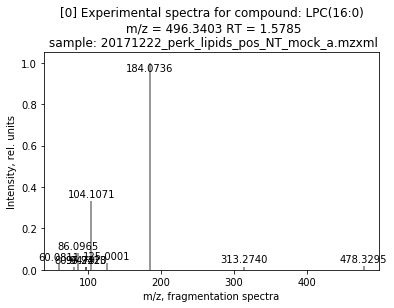

LPC_16_0_index_0_20171222_PERK_E4_pos_PC
[[1.84073639e+02 1.00000000e+00]
 [1.04107132e+02 3.30658585e-01]
 [8.60965500e+01 8.08082446e-02]
 [1.25000130e+02 3.23511735e-02]
 [6.00811119e+01 2.80294884e-02]
 [4.78329529e+02 1.70405935e-02]
 [3.13273956e+02 1.55124515e-02]
 [9.72413025e+01 1.33796372e-02]
 [9.69219589e+01 1.29324216e-02]
 [8.09479065e+01 1.12074800e-02]]
# of spectra: 50
LPC(18:0): mz = 524.3721, RT = 3.817 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


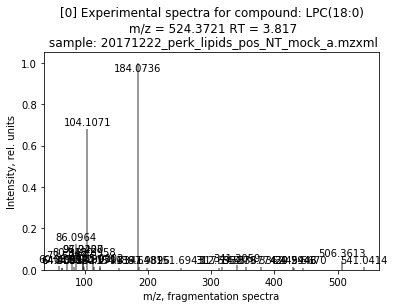

LPC_18_0_index_0_20171222_PERK_E4_pos_PC
[[1.84073578e+02 1.00000000e+00]
 [1.04107086e+02 6.77552164e-01]
 [8.60964355e+01 1.23515688e-01]
 [9.72406616e+01 6.56913146e-02]
 [9.69219589e+01 6.47836477e-02]
 [8.09479752e+01 4.99390177e-02]
 [1.12895760e+02 4.84726354e-02]
 [5.06361267e+02 4.46253754e-02]
 [7.25066528e+01 3.37554067e-02]
 [3.41305908e+02 2.07715221e-02]
 [1.25000229e+02 1.93454549e-02]
 [6.00810852e+01 1.85122844e-02]
 [1.14893082e+02 1.58904213e-02]
 [9.89189758e+01 1.49718616e-02]
 [5.41041443e+02 1.30825788e-02]
 [4.29944824e+02 1.25380922e-02]
 [3.79336182e+02 1.22752991e-02]
 [3.17145325e+02 1.19150653e-02]
 [1.86648148e+02 1.16801346e-02]
 [8.40181885e+01 1.16188135e-02]
 [3.54367676e+02 1.12628937e-02]
 [6.40038223e+01 1.09770661e-02]
 [2.51694321e+02 1.06933294e-02]
 [3.12693298e+02 1.06423926e-02]
 [4.30294647e+02 1.06127374e-02]
 [1.97989624e+02 1.06095932e-02]
 [4.45566956e+02 1.05438149e-02]
 [6.44098740e+01 1.04146339e-02]
 [1.24179573e+02 1.04040802e-02]
 [

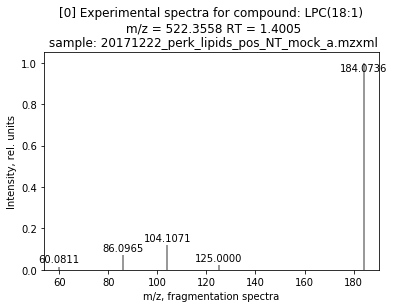

LPC_18_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407358e+02 1.0000000e+00]
 [1.0410710e+02 1.1957801e-01]
 [8.6096527e+01 7.0295677e-02]
 [1.2499999e+02 2.0858467e-02]
 [6.0081127e+01 1.5482418e-02]]
# of spectra: 2
LPC(24:0): mz = 608.4654, RT = 6.181 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


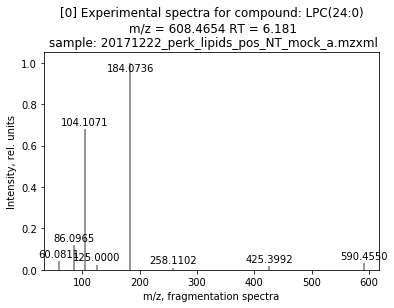

LPC_24_0_index_0_20171222_PERK_E4_pos_PC
[[1.84073608e+02 1.00000000e+00]
 [1.04107117e+02 6.79473221e-01]
 [8.60965347e+01 1.20330416e-01]
 [6.00811234e+01 4.29490954e-02]
 [5.90455017e+02 3.11546065e-02]
 [1.24999977e+02 2.45977622e-02]
 [4.25399170e+02 1.82364061e-02]
 [2.58110229e+02 1.08620264e-02]]
# of spectra: 16
LPC(24:1): mz = 606.4498, RT = 5.5313 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


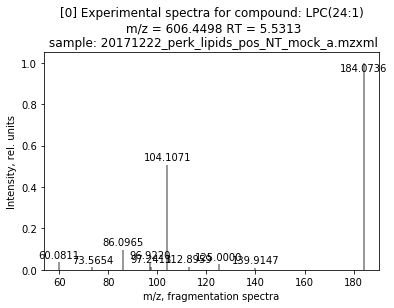

LPC_24_1_index_0_20171222_PERK_E4_pos_PC
[[1.84073624e+02 1.00000000e+00]
 [1.04107117e+02 5.06889522e-01]
 [8.60965118e+01 9.74211022e-02]
 [6.00810509e+01 3.74982916e-02]
 [9.69219513e+01 3.40350904e-02]
 [1.25000046e+02 2.83753201e-02]
 [1.12895927e+02 1.58930942e-02]
 [9.72412567e+01 1.47717120e-02]
 [7.35653610e+01 1.17360400e-02]
 [1.39914719e+02 1.02755800e-02]]
# of spectra: 16
LPC(26:1): mz = 634.4812, RT = 6.0407 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


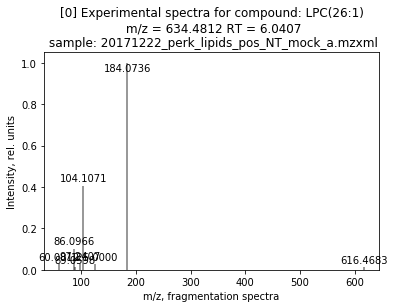

LPC_26_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407364e+02 1.0000000e+00]
 [1.0410714e+02 4.0581581e-01]
 [8.6096573e+01 1.0138582e-01]
 [9.7240723e+01 3.0280763e-02]
 [6.0081158e+01 2.7917616e-02]
 [1.2500004e+02 2.7716240e-02]
 [8.9059769e+01 1.3292150e-02]
 [6.1646826e+02 1.2407621e-02]]
# of spectra: 7
LPC(30:0): mz = 692.5594, RT = 7.1014 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


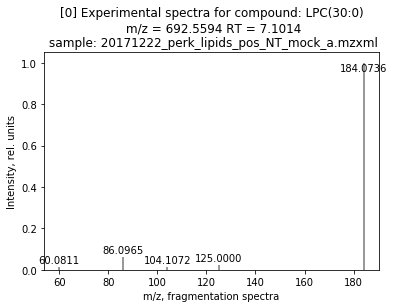

LPC_30_0_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096535e+01 5.9766702e-02]
 [1.2500002e+02 2.2585236e-02]
 [1.0410717e+02 1.3640477e-02]
 [6.0081120e+01 1.2854894e-02]]
# of spectra: 23
LPC(32:0): mz = 720.5905, RT = 7.654 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


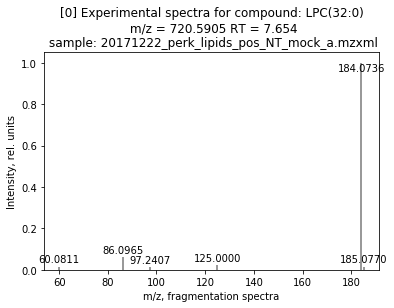

LPC_32_0_index_0_20171222_PERK_E4_pos_PC
[[1.8407359e+02 1.0000000e+00]
 [8.6096527e+01 6.0642514e-02]
 [1.2499999e+02 2.2569617e-02]
 [1.8507695e+02 1.5128474e-02]
 [6.0081116e+01 1.4704314e-02]
 [9.7240723e+01 1.1231246e-02]]
# of spectra: 32
LPC(32:1): mz = 718.574, RT = 7.133 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


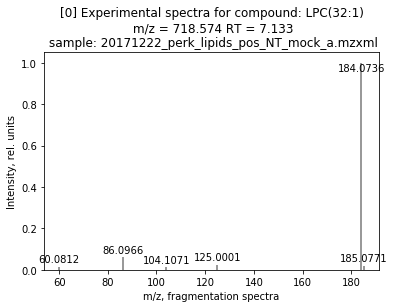

LPC_32_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407364e+02 1.0000000e+00]
 [8.6096558e+01 6.0227551e-02]
 [1.2500005e+02 2.5273122e-02]
 [1.8507707e+02 1.9343389e-02]
 [6.0081150e+01 1.5751718e-02]
 [1.0410713e+02 1.1685884e-02]]
# of spectra: 23
PC(28:0): mz = 678.5072, RT = 6.1265 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


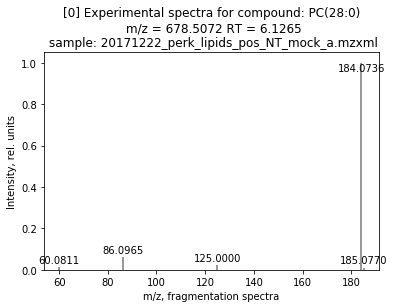

PC_28_0_index_0_20171222_PERK_E4_pos_PC
[[1.8407359e+02 1.0000000e+00]
 [8.6096542e+01 6.0066875e-02]
 [1.2500000e+02 2.0839473e-02]
 [6.0081127e+01 1.3375557e-02]
 [1.8507698e+02 1.0777877e-02]]
# of spectra: 15
PC(28:1): mz = 676.4917, RT = 5.8552 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


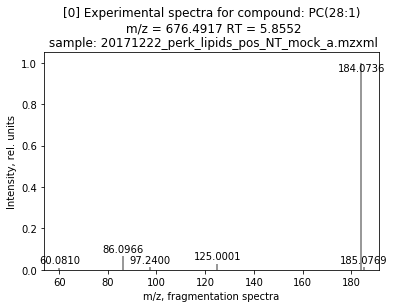

PC_28_1_index_0_20171222_PERK_E4_pos_PC
[[1.84073624e+02 1.00000000e+00]
 [8.60965576e+01 6.50375709e-02]
 [1.25000114e+02 3.03445179e-02]
 [9.72399979e+01 1.39842387e-02]
 [1.85076935e+02 1.19309388e-02]
 [6.00810204e+01 1.04422672e-02]]
# of spectra: 39
PC(30:0): mz = 706.5372, RT = 6.5353 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


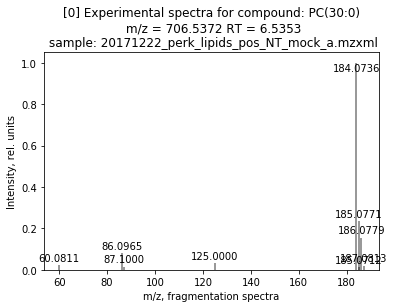

PC_30_0_index_0_20171222_PERK_E4_pos_PC
[[1.8407364e+02 1.0000000e+00]
 [1.8507707e+02 2.3415868e-01]
 [1.8607790e+02 1.5589193e-01]
 [8.6096550e+01 8.0298290e-02]
 [1.2500002e+02 3.0839309e-02]
 [6.0081146e+01 2.1942019e-02]
 [1.8708133e+02 2.0233883e-02]
 [8.7099953e+01 1.4618761e-02]
 [1.8507115e+02 1.2595546e-02]]
# of spectra: 29
PC(30:1): mz = 704.5228, RT = 6.176 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


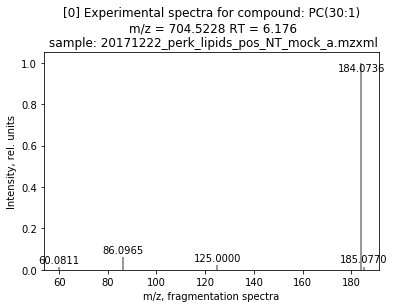

PC_30_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096535e+01 6.1977483e-02]
 [1.2500001e+02 2.2794617e-02]
 [1.8507703e+02 1.5086160e-02]
 [6.0081131e+01 1.1968494e-02]]
# of spectra: 18
PC(30:2): mz = 702.507, RT = 5.9582 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


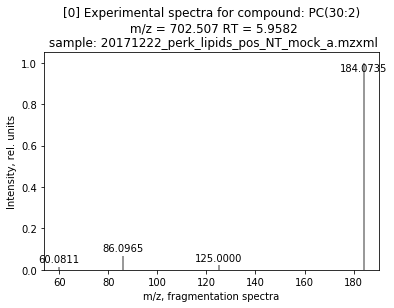

PC_30_2_index_0_20171222_PERK_E4_pos_PC
[[1.8407355e+02 1.0000000e+00]
 [8.6096512e+01 6.7591660e-02]
 [1.2499998e+02 2.1484848e-02]
 [6.0081081e+01 1.4797854e-02]]
# of spectra: 35
PC(32:0): mz = 734.5699, RT = 7.223 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


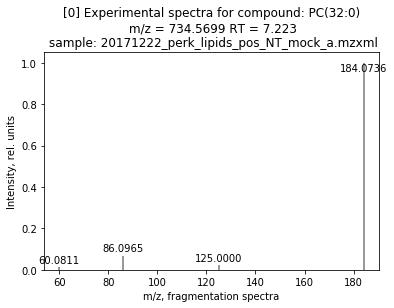

PC_32_0_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096542e+01 6.7556277e-02]
 [1.2500003e+02 2.2386352e-02]
 [6.0081127e+01 1.3510932e-02]]
# of spectra: 49
PC(32:1): mz = 732.5541, RT = 6.6857 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


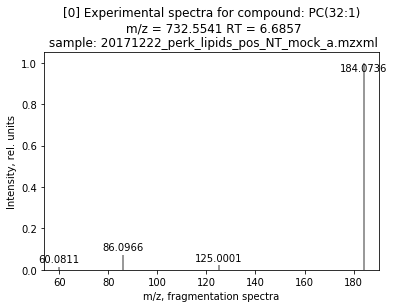

PC_32_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407364e+02 1.0000000e+00]
 [8.6096558e+01 7.3643014e-02]
 [1.2500007e+02 2.3665482e-02]
 [6.0081139e+01 1.5884692e-02]]
# of spectra: 38
PC(32:2): mz = 730.5386, RT = 6.3361 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


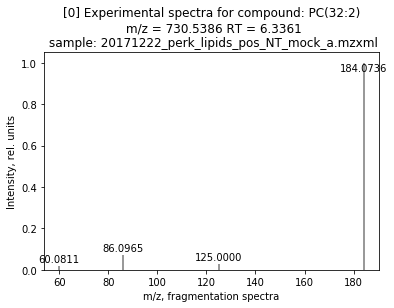

PC_32_2_index_0_20171222_PERK_E4_pos_PC
[[1.8407359e+02 1.0000000e+00]
 [8.6096535e+01 6.9179371e-02]
 [1.2500001e+02 2.7915495e-02]
 [6.0081131e+01 1.8027032e-02]]
# of spectra: 6
PC(34:0): mz = 762.6012, RT = 7.8857 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


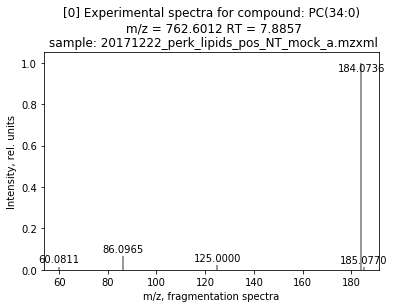

PC_34_0_index_0_20171222_PERK_E4_pos_PC
[[1.8407358e+02 1.0000000e+00]
 [8.6096527e+01 6.5586589e-02]
 [1.2500002e+02 2.3114964e-02]
 [6.0081112e+01 1.5042499e-02]
 [1.8507695e+02 1.2792079e-02]]
# of spectra: 56
PC(34:1): mz = 760.5857, RT = 7.1914 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


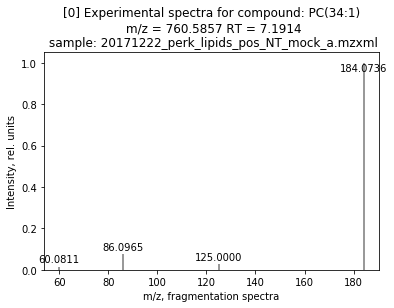

PC_34_1_index_0_20171222_PERK_E4_pos_PC
[[1.84073624e+02 1.00000000e+00]
 [8.60965500e+01 7.43700117e-02]
 [1.25000015e+02 2.67475080e-02]
 [6.00811348e+01 1.49875600e-02]]
# of spectra: 54
PC(34:2): mz = 758.5698, RT = 6.8447 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


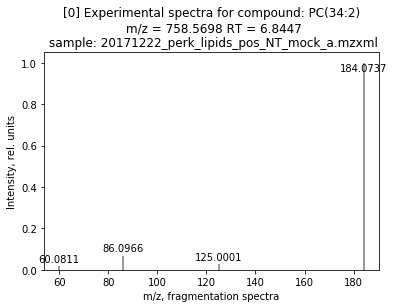

PC_34_2_index_0_20171222_PERK_E4_pos_PC
[[1.8407365e+02 1.0000000e+00]
 [8.6096558e+01 6.8457998e-02]
 [1.2500007e+02 2.6126275e-02]
 [6.0081146e+01 1.6986692e-02]]
# of spectra: 31
PC(34:3): mz = 756.554, RT = 6.4835 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


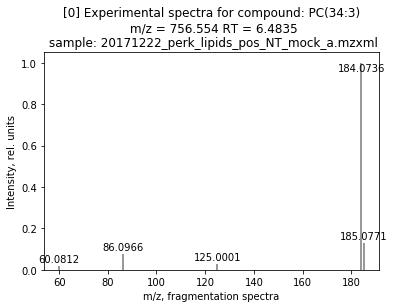

PC_34_3_index_0_20171222_PERK_E4_pos_PC
[[1.8407364e+02 1.0000000e+00]
 [1.8507706e+02 1.2960283e-01]
 [8.6096565e+01 7.6585352e-02]
 [1.2500007e+02 2.6578154e-02]
 [6.0081165e+01 1.5958682e-02]]
# of spectra: 36
PC(34:4): mz = 754.5389, RT = 6.1623 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


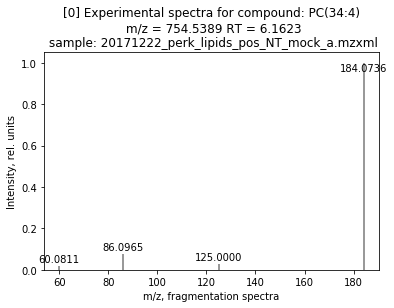

PC_34_4_index_0_20171222_PERK_E4_pos_PC
[[1.8407364e+02 1.0000000e+00]
 [8.6096550e+01 7.6698922e-02]
 [1.2500004e+02 2.7154775e-02]
 [6.0081131e+01 1.7339418e-02]]
# of spectra: 54
PC(36:1): mz = 788.6171, RT = 7.7754 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


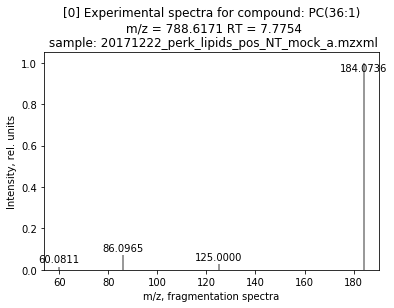

PC_36_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407358e+02 1.0000000e+00]
 [8.6096527e+01 6.9705091e-02]
 [1.2499999e+02 2.5719538e-02]
 [6.0081116e+01 1.4539849e-02]]
# of spectra: 52
PC(36:2): mz = 786.6011, RT = 7.2546 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


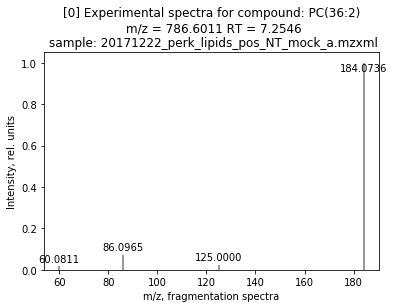

PC_36_2_index_0_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096542e+01 7.3660962e-02]
 [1.2500003e+02 2.5455339e-02]
 [6.0081123e+01 1.7991154e-02]]
# of spectra: 28
PC(36:3): mz = 784.5854, RT = 6.908 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


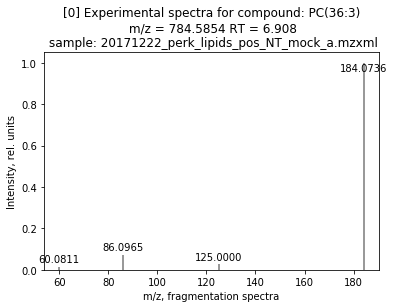

PC_36_3_index_0_20171222_PERK_E4_pos_PC
[[1.84073593e+02 1.00000000e+00]
 [8.60965271e+01 7.24141076e-02]
 [1.25000008e+02 2.78125908e-02]
 [6.00811386e+01 1.49181215e-02]]
# of spectra: 47
PC(36:4): mz = 782.5697, RT = 6.7194 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


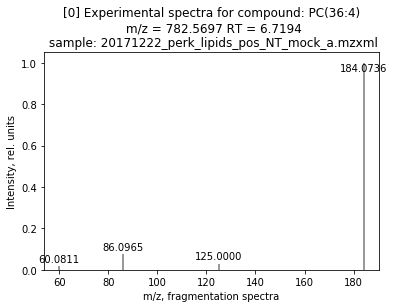

PC_36_4_index_0_20171222_PERK_E4_pos_PC
[[1.84073639e+02 1.00000000e+00]
 [8.60965500e+01 7.68517926e-02]
 [1.25000046e+02 2.97614373e-02]
 [6.00811424e+01 1.78723596e-02]]
# of spectra: 39
PC(36:5): mz = 780.5541, RT = 6.3544 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


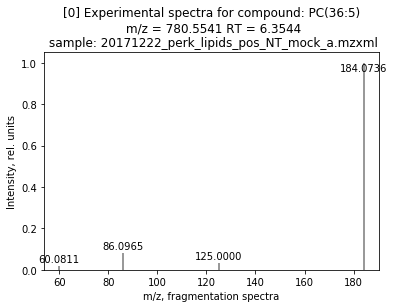

PC_36_5_index_0_20171222_PERK_E4_pos_PC
[[1.8407359e+02 1.0000000e+00]
 [8.6096535e+01 8.0969952e-02]
 [1.2500003e+02 3.0559529e-02]
 [6.0081135e+01 1.9025257e-02]]
# of spectra: 31
PC(36:6): mz = 778.5401, RT = 5.9889 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


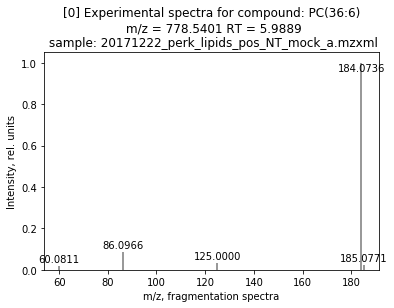

PC_36_6_index_0_20171222_PERK_E4_pos_PC
[[1.8407364e+02 1.0000000e+00]
 [8.6096558e+01 8.4916867e-02]
 [1.2500002e+02 3.2762013e-02]
 [1.8507712e+02 2.3222465e-02]
 [6.0081142e+01 1.7813807e-02]]
# of spectra: 24
PC(38:1): mz = 816.6478, RT = 8.2467 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


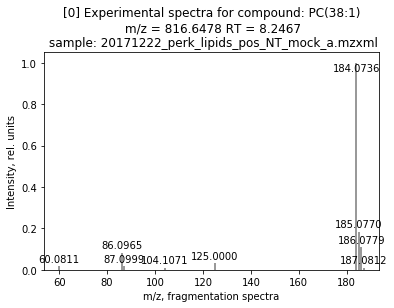

PC_38_1_index_0_20171222_PERK_E4_pos_PC
[[1.84073608e+02 1.00000000e+00]
 [1.85077042e+02 1.83704019e-01]
 [1.86077911e+02 1.09659582e-01]
 [8.60965347e+01 8.26070309e-02]
 [1.25000015e+02 3.09015438e-02]
 [6.00811234e+01 1.90770049e-02]
 [8.70999451e+01 1.60524473e-02]
 [1.04107094e+02 1.09217996e-02]
 [1.87081207e+02 1.04439138e-02]]
# of spectra: 29
PC(38:2): mz = 814.6325, RT = 7.87 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


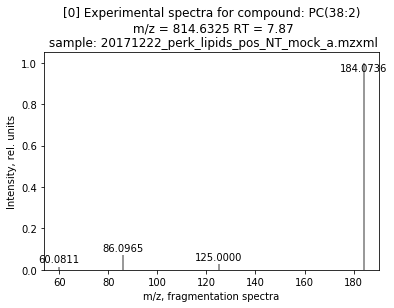

PC_38_2_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096535e+01 6.9574982e-02]
 [1.2499999e+02 2.6712168e-02]
 [6.0081142e+01 1.5361963e-02]]
# of spectra: 23
PC(38:3): mz = 812.6168, RT = 7.5234 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


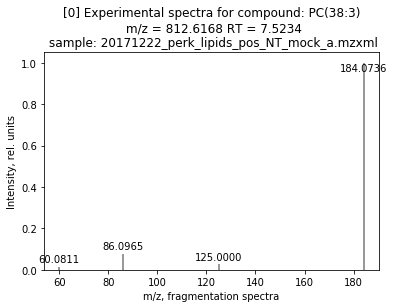

PC_38_3_index_0_20171222_PERK_E4_pos_PC
[[1.8407356e+02 1.0000000e+00]
 [8.6096512e+01 7.7401325e-02]
 [1.2500000e+02 2.6263544e-02]
 [6.0081127e+01 1.4610405e-02]]
# of spectra: 42
PC(38:4): mz = 810.6012, RT = 7.1757 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


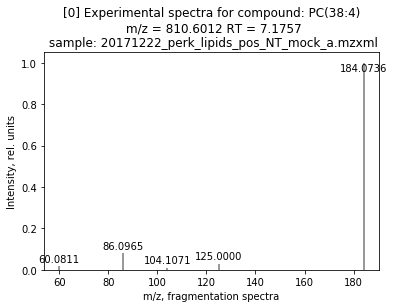

PC_38_4_index_0_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096542e+01 7.9522386e-02]
 [1.2500002e+02 2.9099263e-02]
 [6.0081139e+01 1.8519893e-02]
 [1.0410711e+02 1.0749202e-02]]
# of spectra: 42
PC(38:5): mz = 808.5851, RT = 6.8286 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


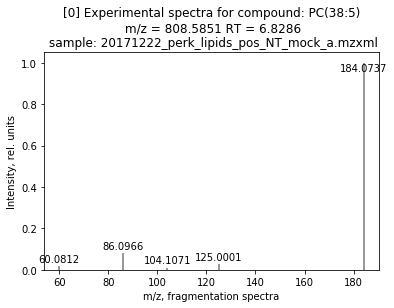

PC_38_5_index_0_20171222_PERK_E4_pos_PC
[[1.8407365e+02 1.0000000e+00]
 [8.6096558e+01 8.0903269e-02]
 [1.2500005e+02 2.6748223e-02]
 [6.0081154e+01 1.6499478e-02]
 [1.0410712e+02 1.0040416e-02]]
# of spectra: 32
PC(38:6): mz = 806.5697, RT = 6.4789 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


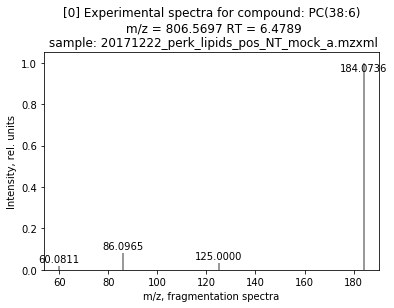

PC_38_6_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096535e+01 8.1448056e-02]
 [1.2500003e+02 3.3414777e-02]
 [6.0081135e+01 1.8241599e-02]]
# of spectra: 18
PC(40:2): mz = 842.6641, RT = 8.3719 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


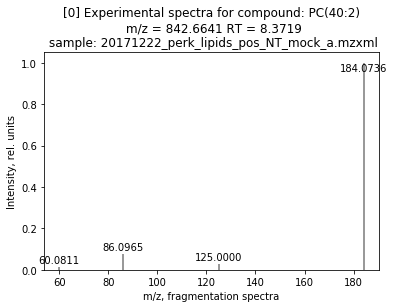

PC_40_2_index_0_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096550e+01 7.5047560e-02]
 [1.2500004e+02 2.6262473e-02]
 [6.0081139e+01 1.3394620e-02]]
# of spectra: 20
PC(40:3): mz = 840.6488, RT = 8.0135 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


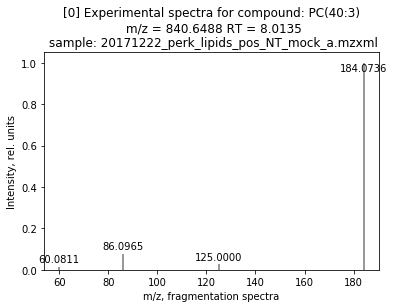

PC_40_3_index_0_20171222_PERK_E4_pos_PC
[[1.8407359e+02 1.0000000e+00]
 [8.6096535e+01 7.7532649e-02]
 [1.2500001e+02 2.6183045e-02]
 [6.0081112e+01 1.4608321e-02]]
# of spectra: 24
PC(40:4): mz = 838.6329, RT = 7.6494 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


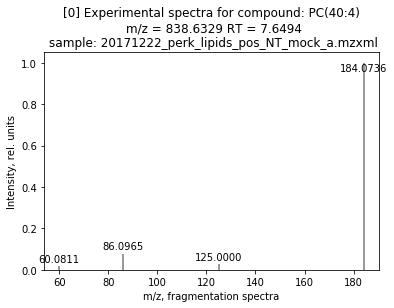

PC_40_4_index_0_20171222_PERK_E4_pos_PC
[[1.84073578e+02 1.00000000e+00]
 [8.60965271e+01 7.79874548e-02]
 [1.25000015e+02 2.70977486e-02]
 [6.00811234e+01 1.73564572e-02]]
# of spectra: 29
PC(40:5): mz = 836.6169, RT = 7.3019 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


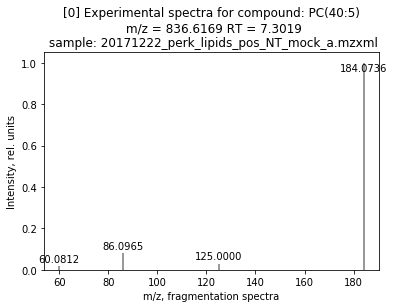

PC_40_5_index_0_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096535e+01 7.9173982e-02]
 [1.2500003e+02 2.9024389e-02]
 [6.0081154e+01 1.5937097e-02]]
# of spectra: 39
PC(40:6): mz = 834.6011, RT = 6.9395 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


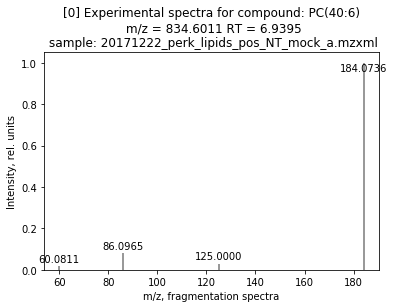

PC_40_6_index_0_20171222_PERK_E4_pos_PC
[[1.8407359e+02 1.0000000e+00]
 [8.6096527e+01 8.0235168e-02]
 [1.2499998e+02 2.9009288e-02]
 [6.0081120e+01 1.8606357e-02]]
# of spectra: 25
PC(40:7): mz = 832.5855, RT = 6.5906 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


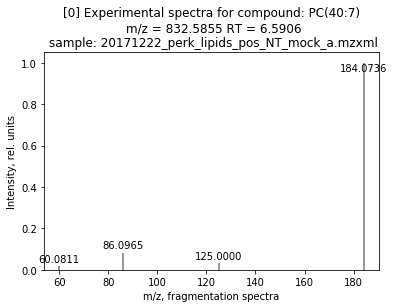

PC_40_7_index_0_20171222_PERK_E4_pos_PC
[[1.8407358e+02 1.0000000e+00]
 [8.6096519e+01 8.2046792e-02]
 [1.2499999e+02 3.1223157e-02]
 [6.0081120e+01 1.7433878e-02]]
# of spectra: 17
PC(40:8): mz = 830.5693, RT = 6.2641 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


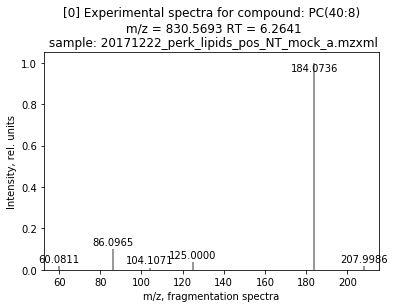

PC_40_8_index_0_20171222_PERK_E4_pos_PC
[[1.84073608e+02 1.00000000e+00]
 [8.60965500e+01 1.01031765e-01]
 [1.24999985e+02 3.84482332e-02]
 [2.07998566e+02 1.83943715e-02]
 [6.00811272e+01 1.74705833e-02]
 [1.04107132e+02 1.03708049e-02]]
# of spectra: 23
PC(42:1): mz = 872.7117, RT = 9.4225 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


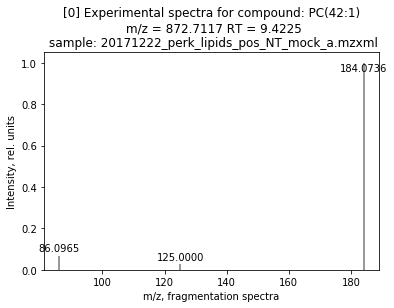

PC_42_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407359e+02 1.0000000e+00]
 [8.6096527e+01 6.7959651e-02]
 [1.2500002e+02 2.7896024e-02]]
# of spectra: 15
PC(42:10): mz = 854.5706, RT = 6.2129 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


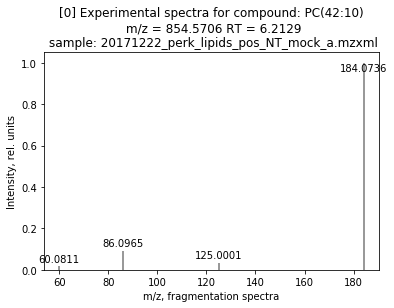

PC_42_10_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096542e+01 9.2436321e-02]
 [1.2500005e+02 3.3968538e-02]
 [6.0081123e+01 1.7254202e-02]]
# of spectra: 25
PC(42:2): mz = 870.6962, RT = 8.7978 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


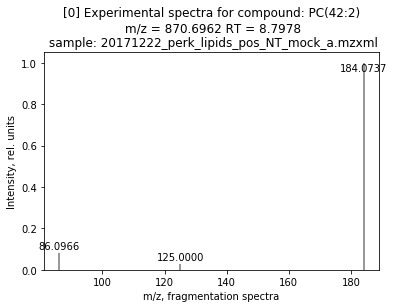

PC_42_2_index_0_20171222_PERK_E4_pos_PC
[[1.8407365e+02 1.0000000e+00]
 [8.6096565e+01 7.9984553e-02]
 [1.2500002e+02 2.6883969e-02]]
# of spectra: 16
PC(42:3): mz = 868.6802, RT = 8.4257 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


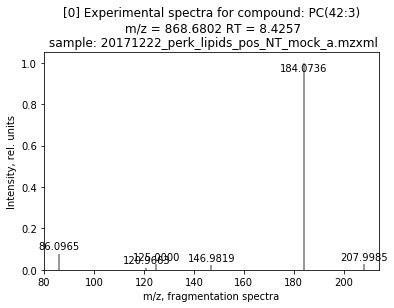

PC_42_3_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096542e+01 7.7675842e-02]
 [2.0799847e+02 2.8384468e-02]
 [1.2500001e+02 2.7116509e-02]
 [1.4698195e+02 2.0824637e-02]
 [1.2096629e+02 1.0532208e-02]]
# of spectra: 16
PC(42:4): mz = 866.6645, RT = 8.0295 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


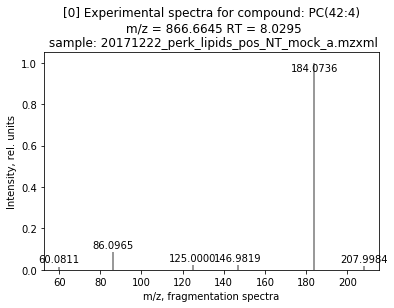

PC_42_4_index_0_20171222_PERK_E4_pos_PC
[[1.84073593e+02 1.00000000e+00]
 [8.60965271e+01 8.54640231e-02]
 [1.24999985e+02 2.38004532e-02]
 [1.46981949e+02 2.28898842e-02]
 [2.07998367e+02 1.77995767e-02]
 [6.00811462e+01 1.51108196e-02]]
# of spectra: 11
PC(42:5): mz = 864.6493, RT = 7.798 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


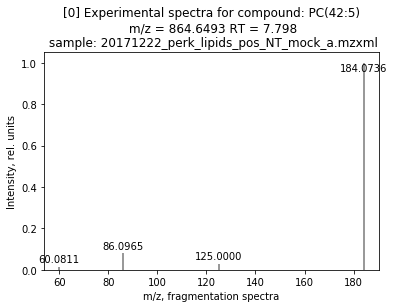

PC_42_5_index_0_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096550e+01 8.1258588e-02]
 [1.2500004e+02 2.9019218e-02]
 [6.0081142e+01 1.4873122e-02]]
# of spectra: 19
PC(42:6): mz = 862.6313, RT = 7.3881 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


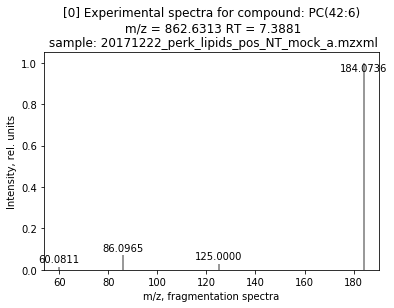

PC_42_6_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096535e+01 7.1964040e-02]
 [1.2499999e+02 2.9788136e-02]
 [6.0081135e+01 1.5368027e-02]]
# of spectra: 13
PC(42:7): mz = 860.6173, RT = 7.1218 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


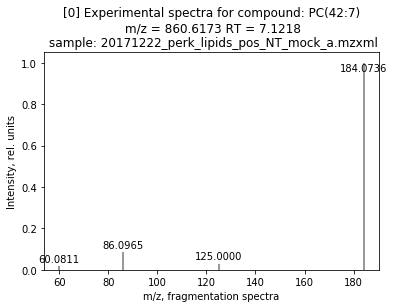

PC_42_7_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096542e+01 8.4856875e-02]
 [1.2500003e+02 3.0130202e-02]
 [6.0081135e+01 1.8468751e-02]]
# of spectra: 18
PC(44:1): mz = 900.7434, RT = 9.9573 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


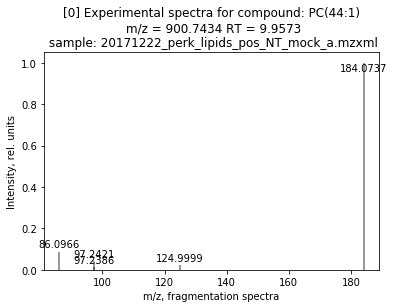

PC_44_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407365e+02 1.0000000e+00]
 [8.6096581e+01 8.7065578e-02]
 [9.7242073e+01 4.2456225e-02]
 [1.2499994e+02 2.2898912e-02]
 [9.7238647e+01 1.3827102e-02]]
# of spectra: 22
PC(44:2): mz = 898.7279, RT = 9.327 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


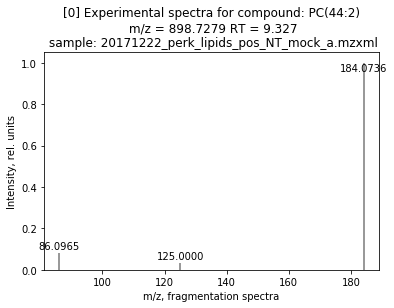

PC_44_2_index_0_20171222_PERK_E4_pos_PC
[[1.8407358e+02 1.0000000e+00]
 [8.6096527e+01 8.0645166e-02]
 [1.2500002e+02 3.0501975e-02]]
# of spectra: 14
PC(44:3): mz = 896.711, RT = 8.9516 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


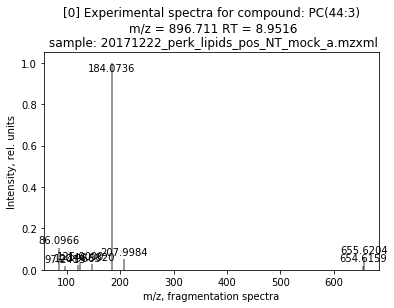

PC_44_3_index_0_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096565e+01 1.0639068e-01]
 [6.5562036e+02 6.1434083e-02]
 [2.0799843e+02 5.1189557e-02]
 [1.2500003e+02 3.1639937e-02]
 [1.4698199e+02 2.6130803e-02]
 [1.2096631e+02 2.1079127e-02]
 [6.5461591e+02 1.9582253e-02]
 [9.7241325e+01 1.7552998e-02]]
# of spectra: 8
PC(50:6): mz = 974.7517, RT = 8.3879 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


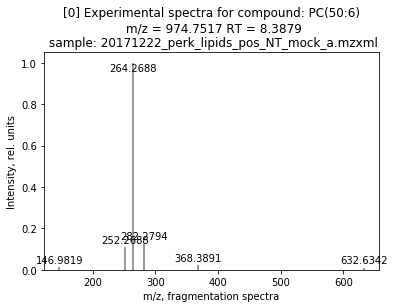

PC_50_6_index_0_20171222_PERK_E4_pos_PC
[[2.64268829e+02 1.00000000e+00]
 [2.82279419e+02 1.25735551e-01]
 [2.52268799e+02 1.08831696e-01]
 [3.68389099e+02 2.27197558e-02]
 [1.46981934e+02 1.34028969e-02]
 [6.32634155e+02 1.01477327e-02]]
# of spectra: 8
PC(50:7): mz = 972.7351, RT = 7.9263 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


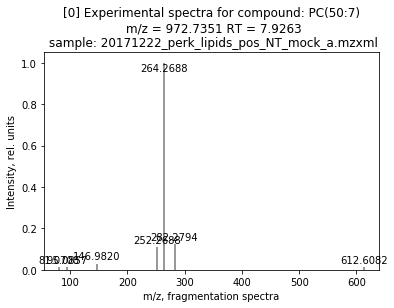

PC_50_7_index_0_20171222_PERK_E4_pos_PC
[[2.6426880e+02 1.0000000e+00]
 [2.8227936e+02 1.2390094e-01]
 [2.5226878e+02 1.1061441e-01]
 [1.4698196e+02 3.0101731e-02]
 [6.1260822e+02 1.3157304e-02]
 [8.1070007e+01 1.2011331e-02]
 [9.5085655e+01 1.1315149e-02]]
# of spectra: 9
LPC(30:1): mz = 690.5441, RT = 7.0636 (20171222_perk_lipids_pos_NT_mock_b.mzxml)


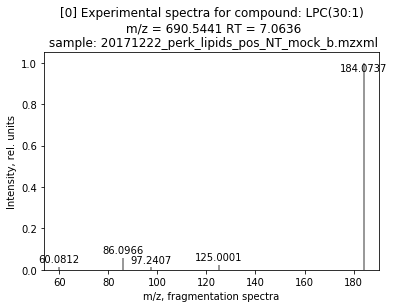

LPC_30_1_index_0_20171222_PERK_E4_pos_PC
[[1.8407373e+02 1.0000000e+00]
 [8.6096596e+01 5.8356501e-02]
 [1.2500007e+02 2.4328554e-02]
 [6.0081173e+01 1.5169166e-02]
 [9.7240730e+01 1.3638938e-02]]
# of spectra: 2
PC(40:0): mz = 846.6964, RT = 9.4818 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


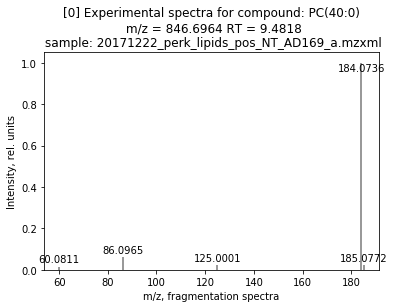

PC_40_0_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096512e+01 6.0193058e-02]
 [1.8507718e+02 2.3520406e-02]
 [1.2500007e+02 2.1518033e-02]
 [6.0081108e+01 1.5529939e-02]]
# of spectra: 5
PC(42:0): mz = 874.7276, RT = 9.9037 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


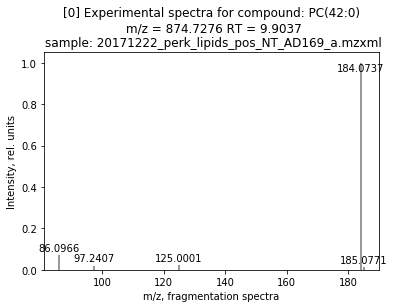

PC_42_0_index_0_20171222_PERK_E4_pos_PC
[[1.84073654e+02 1.00000000e+00]
 [8.60965576e+01 6.99489191e-02]
 [1.25000084e+02 2.26657111e-02]
 [9.72407303e+01 2.06606872e-02]
 [1.85077133e+02 1.21750450e-02]]
# of spectra: 12
PC(44:4): mz = 894.6968, RT = 8.6148 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


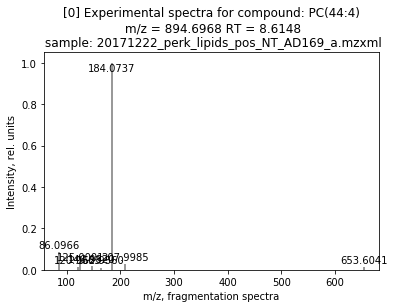

PC_44_4_index_0_20171222_PERK_E4_pos_PC
[[1.84073685e+02 1.00000000e+00]
 [8.60965805e+01 8.57660696e-02]
 [1.25000061e+02 2.87073385e-02]
 [2.07998474e+02 2.60855388e-02]
 [1.46981995e+02 1.78571921e-02]
 [6.53604065e+02 1.40188271e-02]
 [1.20966339e+02 1.13102645e-02]
 [1.62956024e+02 1.04613677e-02]]
# of spectra: 8
PC(44:5): mz = 892.6802, RT = 8.3419 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


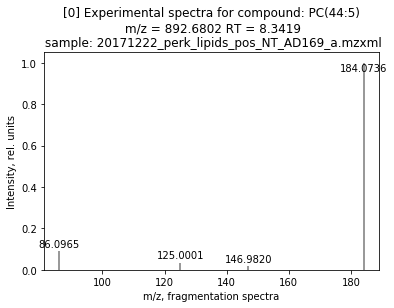

PC_44_5_index_0_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096550e+01 8.8869736e-02]
 [1.2500005e+02 3.3898026e-02]
 [1.4698196e+02 1.7425658e-02]]
# of spectra: 4
PC(46:1): mz = 928.7751, RT = 10.4022 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


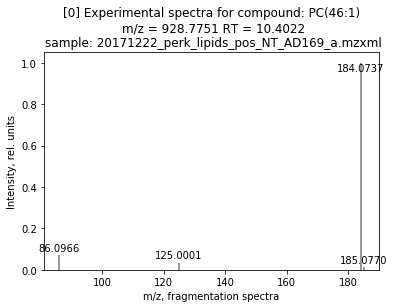

PC_46_1_index_0_20171222_PERK_E4_pos_PC
[[1.84073654e+02 1.00000000e+00]
 [8.60965652e+01 7.00868741e-02]
 [1.25000099e+02 3.37487273e-02]
 [1.85076965e+02 1.32831205e-02]]
# of spectra: 11
PC(46:2): mz = 926.7596, RT = 9.8486 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


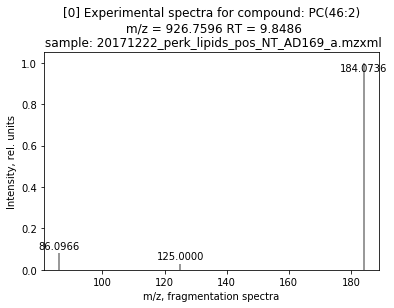

PC_46_2_index_0_20171222_PERK_E4_pos_PC
[[1.84073639e+02 1.00000000e+00]
 [8.60965576e+01 8.12984258e-02]
 [1.25000046e+02 3.01606487e-02]]
# of spectra: 3
PC(46:3): mz = 924.7422, RT = 9.4768 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


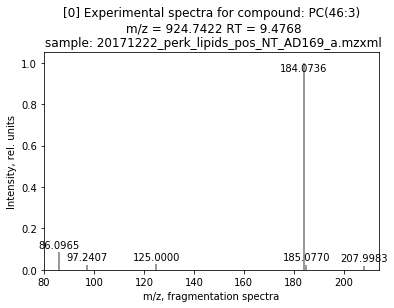

PC_46_3_index_0_20171222_PERK_E4_pos_PC
[[1.84073608e+02 1.00000000e+00]
 [8.60965500e+01 8.54369029e-02]
 [1.24999985e+02 2.58465465e-02]
 [1.85076981e+02 2.49950569e-02]
 [9.72406769e+01 2.43740007e-02]
 [2.07998337e+02 1.96124204e-02]]
# of spectra: 72
PC(46:4): mz = 922.728, RT = 9.2373 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


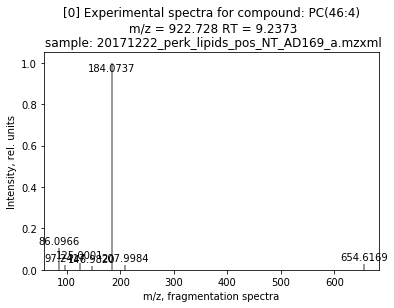

PC_46_4_index_0_20171222_PERK_E4_pos_PC
[[1.8407365e+02 1.0000000e+00]
 [8.6096565e+01 1.0524062e-01]
 [1.2500011e+02 3.3739962e-02]
 [6.5461688e+02 2.7719270e-02]
 [9.7241722e+01 2.2615710e-02]
 [2.0799843e+02 2.1387868e-02]
 [1.4698196e+02 1.6600981e-02]]
# of spectra: 32
PC(46:5): mz = 920.7111, RT = 8.7852 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


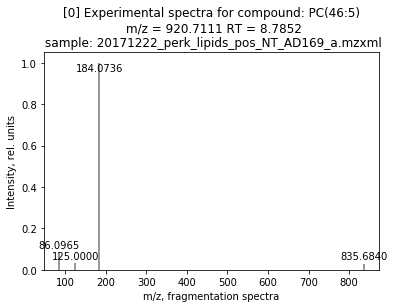

PC_46_5_index_0_20171222_PERK_E4_pos_PC
[[1.8407364e+02 1.0000000e+00]
 [8.6096550e+01 8.5232064e-02]
 [1.2500004e+02 3.2854371e-02]
 [8.3568402e+02 2.9124660e-02]]
# of spectra: 2
PC(48:2): mz = 954.7918, RT = 10.4165 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


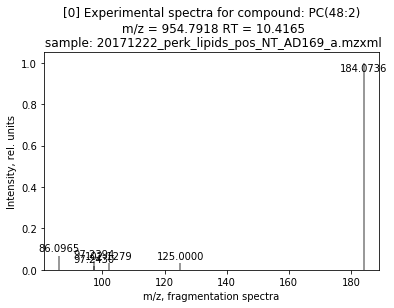

PC_48_2_index_0_20171222_PERK_E4_pos_PC
[[1.84073639e+02 1.00000000e+00]
 [8.60965500e+01 6.86265901e-02]
 [9.72394257e+01 4.22891006e-02]
 [1.24999977e+02 3.28482315e-02]
 [1.02127914e+02 3.16534191e-02]
 [9.72429581e+01 1.65666677e-02]]
# of spectra: 1
PC(38:0): mz = 818.6556, RT = 8.2948 (20171222_perk_lipids_pos_perk_E4_mock_a.mzxml)


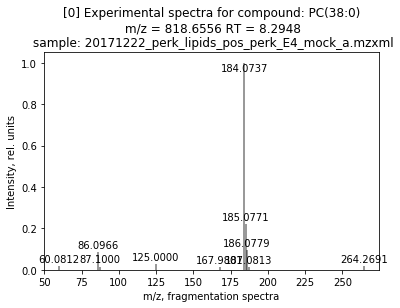

PC_38_0_index_0_20171222_PERK_E4_pos_PC
[[1.8407365e+02 1.0000000e+00]
 [1.8507707e+02 2.2028966e-01]
 [1.8607794e+02 9.6249595e-02]
 [8.6096573e+01 8.5032083e-02]
 [1.2500003e+02 2.5887022e-02]
 [2.6426907e+02 1.8197559e-02]
 [6.0081154e+01 1.6728848e-02]
 [8.7099953e+01 1.5423463e-02]
 [1.6798007e+02 1.3938599e-02]
 [1.8708125e+02 1.1192683e-02]]
# of spectra: 3
PC(44:12): mz = 878.5758, RT = 6.2203 (20171222_perk_lipids_pos_perk_E4_mock_a.mzxml)


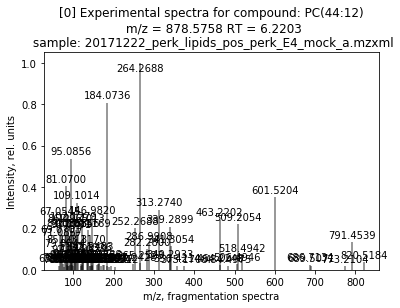

PC_44_12_index_0_20171222_PERK_E4_pos_PC
[[2.64268829e+02 1.00000000e+00]
 [1.84073593e+02 8.07832122e-01]
 [9.50856476e+01 5.36615133e-01]
 [8.10700073e+01 4.04324234e-01]
 [6.01520386e+02 3.50678861e-01]
 [1.09101364e+02 3.24829757e-01]
 [3.13274048e+02 2.90443331e-01]
 [1.46981964e+02 2.55206555e-01]
 [6.70544662e+01 2.49225482e-01]
 [4.63220215e+02 2.42199376e-01]
 [1.02127884e+02 2.25818738e-01]
 [5.09205353e+02 2.21615568e-01]
 [1.21101280e+02 2.15943724e-01]
 [8.60965118e+01 2.13971227e-01]
 [3.39289917e+02 2.08427653e-01]
 [2.52268829e+02 2.02385604e-01]
 [1.35116852e+02 1.92061737e-01]
 [1.07085594e+02 1.90733299e-01]
 [8.30856018e+01 1.89570755e-01]
 [9.71013641e+01 1.88534006e-01]
 [9.30700684e+01 1.85955644e-01]
 [6.90701218e+01 1.62150621e-01]
 [7.10856705e+01 1.48284167e-01]
 [7.91453857e+02 1.34087965e-01]
 [2.86990784e+02 1.29565388e-01]
 [1.23116951e+02 1.15596779e-01]
 [8.51012955e+01 1.14623919e-01]
 [3.41305389e+02 1.12806588e-01]
 [2.82279968e+02 1.00372091e-01]
 [

In [16]:
for compound in filtered_data['compound'].unique().tolist():
    mv.spectra_plot_compound(filtered_data, compound, base_name, fig_out, index=0, 
                             spectensity=0.01, compound_col='compound', save = True, run_all = False)

#### Generate all spectra for individual compounds

If you want to look at all the spectra associated with one particular compound (e.g. "PC(50:5)"), change the "compound" variable to EXACTLY the name of the compound you are looking for. The code as written will show you each spectra in the window below. If you want to save them all you can change "save" from False to True inside the parentheses.

# of spectra: 16
PC(42:3): mz = 868.6802, RT = 8.4257 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


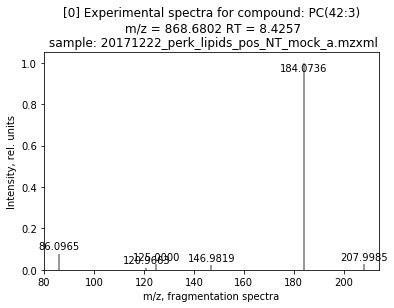

PC_42_3_index_0_20171222_PERK_E4_pos_PC
[[1.8407361e+02 1.0000000e+00]
 [8.6096542e+01 7.7675842e-02]
 [2.0799847e+02 2.8384468e-02]
 [1.2500001e+02 2.7116509e-02]
 [1.4698195e+02 2.0824637e-02]
 [1.2096629e+02 1.0532208e-02]]
PC-42-3: mz = 868.681, RT = 8.6069 (20171222_perk_lipids_pos_NT_mock_a.mzxml)


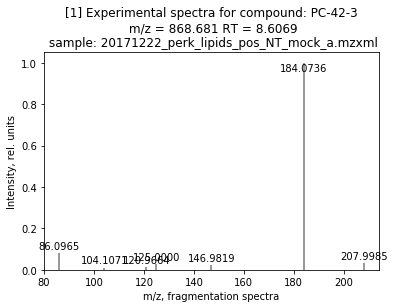

PC_42_3_index_1_20171222_PERK_E4_pos_PC
[[1.84073608e+02 1.00000000e+00]
 [8.60965424e+01 8.05438757e-02]
 [2.07998459e+02 3.10901180e-02]
 [1.24999992e+02 2.75541693e-02]
 [1.46981918e+02 2.11244877e-02]
 [1.20966370e+02 1.12216985e-02]
 [1.04107086e+02 1.03824427e-02]]
PC-42-3: mz = 868.6805, RT = 8.4464 (20171222_perk_lipids_pos_NT_mock_b.mzxml)


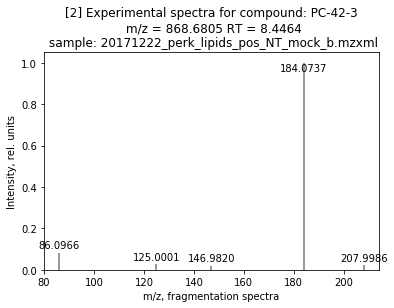

PC_42_3_index_2_20171222_PERK_E4_pos_PC
[[1.8407367e+02 1.0000000e+00]
 [8.6096565e+01 8.3359003e-02]
 [1.2500007e+02 2.5614051e-02]
 [2.0799857e+02 2.2361340e-02]
 [1.4698199e+02 1.9205132e-02]]
PC-42-3: mz = 868.681, RT = 8.6298 (20171222_perk_lipids_pos_NT_mock_b.mzxml)


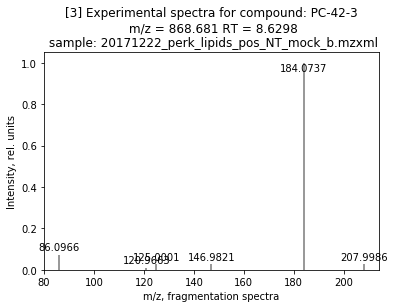

PC_42_3_index_3_20171222_PERK_E4_pos_PC
[[1.8407372e+02 1.0000000e+00]
 [8.6096573e+01 7.2342299e-02]
 [1.2500011e+02 2.7147634e-02]
 [2.0799858e+02 2.7116392e-02]
 [1.4698206e+02 2.7099676e-02]
 [1.2096634e+02 1.0015747e-02]]
PC-42-3: mz = 868.68, RT = 8.4167 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


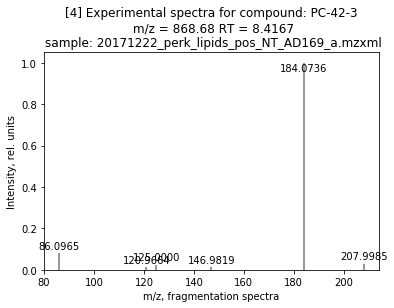

PC_42_3_index_4_20171222_PERK_E4_pos_PC
[[1.84073624e+02 1.00000000e+00]
 [8.60965500e+01 8.14159587e-02]
 [2.07998459e+02 2.88801640e-02]
 [1.25000023e+02 2.41577439e-02]
 [1.46981949e+02 1.27734719e-02]
 [1.20966354e+02 1.21966330e-02]]
PC-42-3: mz = 868.6816, RT = 8.5911 (20171222_perk_lipids_pos_NT_AD169_a.mzxml)


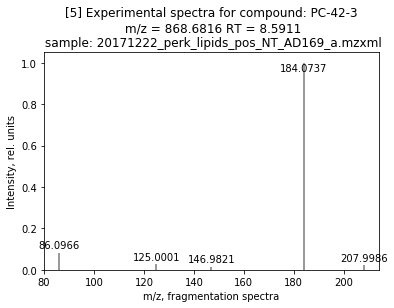

PC_42_3_index_5_20171222_PERK_E4_pos_PC
[[1.8407370e+02 1.0000000e+00]
 [8.6096588e+01 8.2678735e-02]
 [1.2500009e+02 2.8136736e-02]
 [2.0799861e+02 2.3564087e-02]
 [1.4698206e+02 1.4992589e-02]]
PC-42-3: mz = 868.6807, RT = 8.422 (20171222_perk_lipids_pos_NT_AD169_b.mzxml)


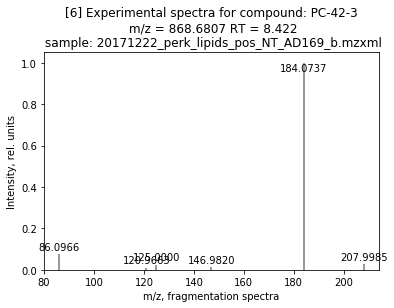

PC_42_3_index_6_20171222_PERK_E4_pos_PC
[[1.84073669e+02 1.00000000e+00]
 [8.60965576e+01 7.69442171e-02]
 [2.07998520e+02 2.74618585e-02]
 [1.25000015e+02 2.50708200e-02]
 [1.46982025e+02 1.38210161e-02]
 [1.20966286e+02 1.02566443e-02]]
PC-42-3: mz = 868.6817, RT = 8.5999 (20171222_perk_lipids_pos_NT_AD169_b.mzxml)


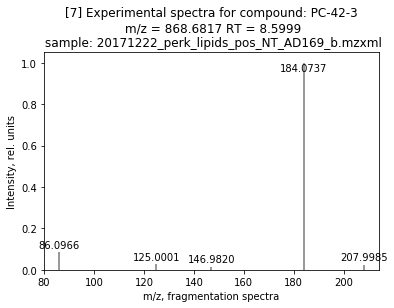

PC_42_3_index_7_20171222_PERK_E4_pos_PC
[[1.8407368e+02 1.0000000e+00]
 [8.6096581e+01 8.4619790e-02]
 [1.2500005e+02 2.6260749e-02]
 [2.0799852e+02 2.4368245e-02]
 [1.4698204e+02 1.4786900e-02]]
PC-42-3: mz = 868.6799, RT = 8.4071 (20171222_perk_lipids_pos_perk_E4_mock_a.mzxml)


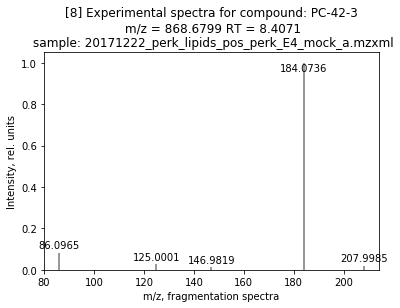

PC_42_3_index_8_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096542e+01 8.2100593e-02]
 [1.2500006e+02 2.6881594e-02]
 [2.0799846e+02 2.0422233e-02]
 [1.4698192e+02 1.4278181e-02]]
PC-42-3: mz = 868.6811, RT = 8.5986 (20171222_perk_lipids_pos_perk_E4_mock_a.mzxml)


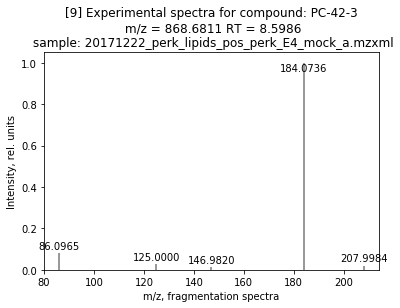

PC_42_3_index_9_20171222_PERK_E4_pos_PC
[[1.8407358e+02 1.0000000e+00]
 [8.6096535e+01 8.0721222e-02]
 [1.2499999e+02 2.8230483e-02]
 [2.0799844e+02 2.0214215e-02]
 [1.4698198e+02 1.1977390e-02]]
PC-42-3: mz = 868.6801, RT = 8.366 (20171222_perk_lipids_pos_perk_E4_mock_b.mzxml)


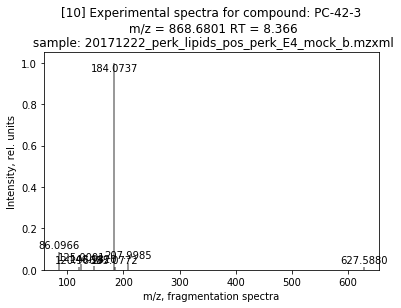

PC_42_3_index_10_20171222_PERK_E4_pos_PC
[[1.8407365e+02 1.0000000e+00]
 [8.6096558e+01 8.5105784e-02]
 [2.0799847e+02 3.3803798e-02]
 [1.2500006e+02 2.8517585e-02]
 [1.4698203e+02 1.8969273e-02]
 [1.8507718e+02 1.3253781e-02]
 [1.2096630e+02 1.2833517e-02]
 [6.2758795e+02 1.1302800e-02]]
PC-42-3: mz = 868.6813, RT = 8.5519 (20171222_perk_lipids_pos_perk_E4_mock_b.mzxml)


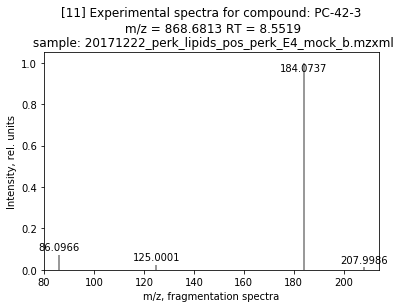

PC_42_3_index_11_20171222_PERK_E4_pos_PC
[[1.8407367e+02 1.0000000e+00]
 [8.6096573e+01 7.2682157e-02]
 [1.2500007e+02 2.5105989e-02]
 [2.0799863e+02 1.3931121e-02]]
PC-42-3: mz = 868.6805, RT = 8.4092 (20171222_perk_lipids_pos_perk_E4_AD169_a.mzxml)


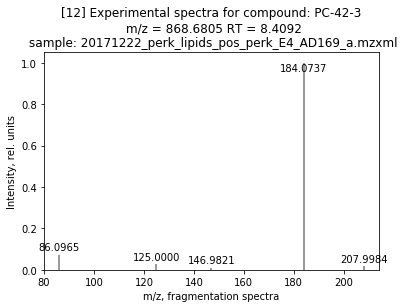

PC_42_3_index_12_20171222_PERK_E4_pos_PC
[[1.8407365e+02 1.0000000e+00]
 [8.6096550e+01 7.3525809e-02]
 [1.2500003e+02 2.7128598e-02]
 [2.0799843e+02 1.8983109e-02]
 [1.4698206e+02 1.0354484e-02]]
PC-42-3: mz = 868.6811, RT = 8.6014 (20171222_perk_lipids_pos_perk_E4_AD169_a.mzxml)


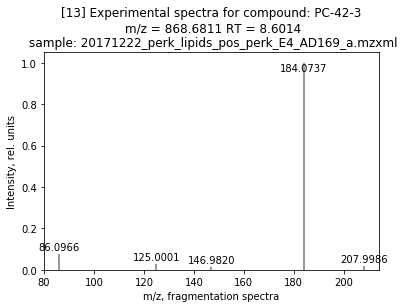

PC_42_3_index_13_20171222_PERK_E4_pos_PC
[[1.8407368e+02 1.0000000e+00]
 [8.6096581e+01 7.5303018e-02]
 [1.2500008e+02 2.7469138e-02]
 [2.0799860e+02 1.7714961e-02]
 [1.4698201e+02 1.1817365e-02]]
PC-42-3: mz = 868.6802, RT = 8.4188 (20171222_perk_lipids_pos_perk_E4_AD169_b.mzxml)


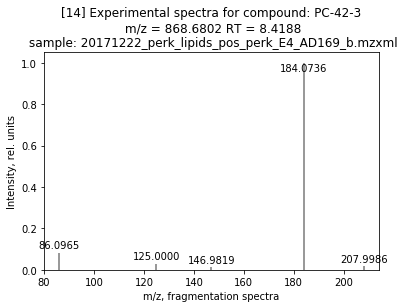

PC_42_3_index_14_20171222_PERK_E4_pos_PC
[[1.84073624e+02 1.00000000e+00]
 [8.60965500e+01 8.25193599e-02]
 [1.25000046e+02 2.96056289e-02]
 [2.07998550e+02 1.86757334e-02]
 [1.46981949e+02 1.13085518e-02]]
PC-42-3: mz = 868.681, RT = 8.5927 (20171222_perk_lipids_pos_perk_E4_AD169_b.mzxml)


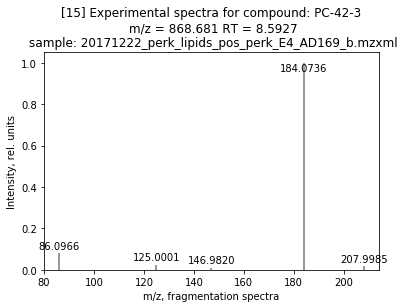

PC_42_3_index_15_20171222_PERK_E4_pos_PC
[[1.8407362e+02 1.0000000e+00]
 [8.6096558e+01 7.9117887e-02]
 [1.2500006e+02 2.5571423e-02]
 [2.0799854e+02 1.6199559e-02]
 [1.4698203e+02 1.0318726e-02]]


In [18]:
compound = 'PC(42:3)'
mv.spectra_plot_compound(filtered_data, compound, base_name, fig_out, index=0, 
                             spectensity=0.01, compound_col='compound', save = False, run_all = True)

#### Generate one spectra by compound name and index

If you want to look at one particular compound and one particular index (the same index as in the CSV list you saved earlier) you can input them here. Currently it is set to both show you in the window and save it to your spectra directory.

# of spectra: 52
PC(36:2): mz = 786.6024, RT = 8.1462 (20171222_perk_lipids_pos_perk_E4_AD169_b.mzxml)


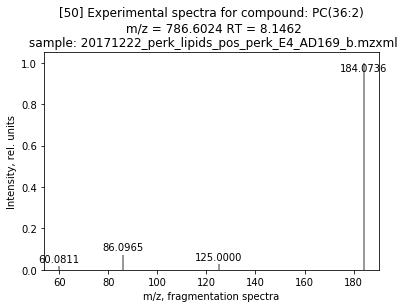

PC_36_2_index_50_20171222_PERK_E4_pos_PC
[[1.84073639e+02 1.00000000e+00]
 [8.60965500e+01 7.27761164e-02]
 [1.25000015e+02 2.77658906e-02]
 [6.00811386e+01 1.80858616e-02]]


In [19]:
compound = 'PC(36:2)'
index = 50

mv.spectra_plot_compound(filtered_data, compound, base_name, fig_out, index=index, 
                             spectensity=0.01, compound_col='compound', save = True, run_all = False)